In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df=pd.read_csv('../prepared_data.csv')
df.set_index('Id', inplace=True)
df

,Coarseness/ngtdm/original,Energy/firstorder/original,GrayLevelNonUniformity/glrlm/original,GrayLevelNonUniformity/glszm/original,Idn/glcm/original,LargeDependenceHighGrayLevelEmphasis/gldm/original,Maximum/Image-original/diagnostics,RunLengthNonUniformity/glrlm/original,SmallDependenceLowGrayLevelEmphasis/gldm/original,TotalEnergy/firstorder/original,VolumeNum/Mask-original/diagnostics,VoxelNum/Mask-original/diagnostics,ZoneEntropy/glszm/original,y.BoundingBox/Mask-original/diagnostics,y.CenterOfMassIndex/Mask-original/diagnostics,highGrade
Id,,,,,,,,,,,,,,,,
0.783201,0.007719,1.115748e+07,158.590584,17.388889,0.935386,652.826984,237.0,175.099687,0.006669,1.115748e+07,1.0,1260,4.696937,138.0,161.988889,True
0.729412,0.004074,3.206621e+07,293.777441,50.100719,0.934436,611.548231,253.0,546.590764,0.009179,3.206621e+07,1.0,2685,5.422075,112.0,149.808566,True
0.662097,0.002515,5.772904e+07,435.126064,85.296015,0.934934,660.159679,270.0,961.241702,0.008074,5.505470e+07,1.0,3244,5.453404,104.0,152.673859,True
0.782308,0.006769,5.558937e+07,158.487887,27.150943,0.951514,1143.141304,314.0,273.906764,0.006239,4.038406e+07,1.0,1840,5.047446,150.0,171.559783,True
0.585369,0.006528,5.079416e+08,149.244465,44.787419,0.949190,3356.104019,981.0,696.367524,0.001814,1.705622e+09,1.0,1692,5.763565,181.0,202.115248,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.774391,0.005374,2.601654e+07,218.499407,26.022901,0.946634,914.722605,277.0,273.046673,0.005010,2.481130e+07,1.0,1889,5.046687,108.0,132.161461,False
0.720461,0.003218,7.703724e+07,336.608660,65.146868,0.942016,1141.659639,325.0,778.238077,0.009901,7.946346e+07,1.0,3652,5.347434,61.0,101.386911,False
0.601364,0.002340,3.315145e+09,434.953676,126.697412,0.967871,9096.525085,1411.0,2394.525537,0.000652,1.113196e+10,1.0,6199,6.406543,137.0,188.893209,True


In [66]:
# df es el de train y df_test de test
df, df_test = train_test_split(
    df,
    test_size=0.2,
    stratify=df['highGrade'],  # mantiene la proporción de clases
    random_state=42
)

### Balances

In [67]:
# TRAINING DATASET
print("HIGHS: ", df['highGrade'].sum()/df.shape[0]) 

print("LOWS: ", 1-df['highGrade'].sum()/df.shape[0])

# TESTING DATASET
print("HIGHS: ", df_test['highGrade'].sum()/df_test.shape[0]) 

print("LOWS: ", 1-df_test['highGrade'].sum()/df_test.shape[0])

HIGHS:  0.7745098039215687
LOWS:  0.22549019607843135
HIGHS:  0.7692307692307693
LOWS:  0.23076923076923073


In [68]:
X_train = df.drop(columns=['highGrade'])
y_train = df['highGrade']
X_test = df_test.drop(columns=['highGrade'])
y_test = df_test['highGrade']

print("X_train: ", X_train, " ", X_train.shape)
print("y_train: ", y_train, " ", y_train.shape)

X_train:            Coarseness/ngtdm/original  Energy/firstorder/original  \
Id                                                                
0.772609                   0.002958                5.804427e+07   
0.840175                   0.005139                5.270766e+07   
0.950678                   0.002653                4.640192e+07   
0.748434                   0.004836                1.142981e+09   
0.694182                   0.006406                1.028613e+09   
...                             ...                         ...   
0.547791                   0.002172                1.043717e+09   
0.678449                   0.001509                5.289189e+08   
0.638924                   0.002276                6.735103e+08   
0.591243                   0.002874                1.669506e+09   
0.858519                   0.006142                5.678053e+07   

          GrayLevelNonUniformity/glrlm/original  \
Id                                                
0.772609        

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, average_precision_score
import numpy as np

# Load your data (replace with your actual data loading)
# X_train, y_train, X_test, y_test = load_your_data()

# Create the base XGBoost classifier with fixed parameters
xgb_model = xgb.XGBClassifier(
    seed=42,
    objective='binary:logistic',
    eval_metric='aucpr',
    verbose=True
)

# Define the parameter grid to search
param_grid = {
    'gamma': [0, 0.1, 0.25, 0.5, 1],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'reg_lambda': [1, 5, 10],
    'scale_pos_weight': [np.sum(y_train == False) / np.sum(y_train == True)],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create a custom scorer for AUCPR (Area Under Precision-Recall Curve)
aucpr_scorer = make_scorer(average_precision_score, needs_proba=True)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=aucpr_scorer,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=3, # Show progress
    refit=True  
)

# Fit the grid search to the data
grid_search.fit(
    X_train, 
    y_train,
    eval_set=[(X_test, y_test)]
)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best AUCPR score: ", grid_search.best_score_)

# Get the best model
best_xgb = grid_search.best_estimator_

# You can now use best_xgb for predictions or further analysis

Per-class metrics:
Class 0 - Precision: 0.2857, Recall: 0.3333, F1: 0.3077
Class 1 - Precision: 0.7895, Recall: 0.7500, F1: 0.7692
Overall ROC AUC: 0.5333


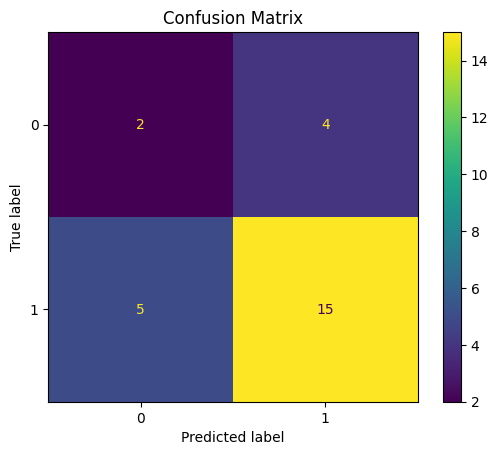

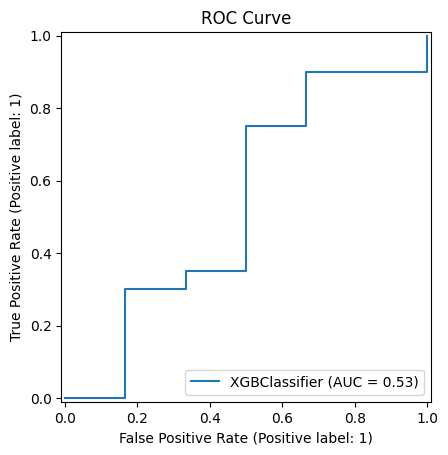

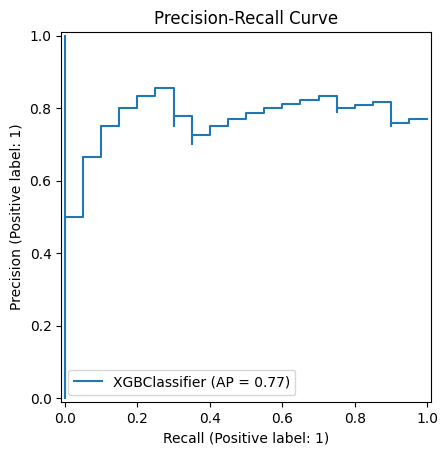

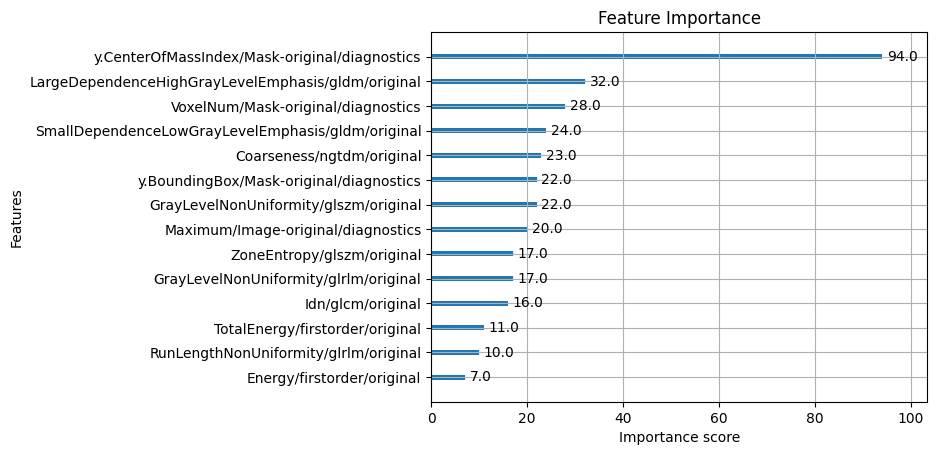

In [72]:
from sklearn.metrics import (precision_score, recall_score, f1_score, 
                            confusion_matrix, roc_auc_score, RocCurveDisplay, 
                            PrecisionRecallDisplay, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt

# 1. Get predictions
y_pred = best_xgb.predict(X_test)  # Class predictions (0/1)
y_proba = best_xgb.predict_proba(X_test)[:, 1]  # Probability scores for positive class


# 2. Calculate metrics for each class
precision = precision_score(y_test, y_pred, average=None, labels=[0, 1])
recall = recall_score(y_test, y_pred, average=None, labels=[0, 1])
f1 = f1_score(y_test, y_pred, average=None, labels=[0, 1])
roc_auc = roc_auc_score(y_test, y_proba)  # Still a single value — area under the ROC curve

# 3. Print nicely
print("Per-class metrics:")
print(f"Class 0 - Precision: {precision[0]:.4f}, Recall: {recall[0]:.4f}, F1: {f1[0]:.4f}")
print(f"Class 1 - Precision: {precision[1]:.4f}, Recall: {recall[1]:.4f}, F1: {f1[1]:.4f}")
print(f"Overall ROC AUC: {roc_auc:.4f}")

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# 4. ROC Curve
RocCurveDisplay.from_estimator(best_xgb, X_test, y_test)
plt.title("ROC Curve")
plt.show()

# 5. Precision-Recall Curve (especially important for imbalanced data)
PrecisionRecallDisplay.from_estimator(best_xgb, X_test, y_test)
plt.title("Precision-Recall Curve")
plt.show()

# 6. Feature Importance (bonus)
xgb.plot_importance(best_xgb)
plt.title("Feature Importance")
plt.show()